In [1]:
using PyPlot

# Układ dwóch neuronów McCullocha-Pittsa
*Wang X., Complex Systems **5**, 425 (1991)*

<img src="2neurony.jpg" style="height:200px">

$$
S_1(t+1)=f [( w_{11}S_1(t)+w_{12}S_2(t) ]
$$
$$
S_2(t+1)=f [( w_{21}S_1(t)+w_{22}S_2(t) ]
$$

## Funkcja aktywacji
$$
f(x) = \frac{1}{1+e^{-\mu x}}
$$

In [2]:
f(x,μ)=1/(1+exp(-μ*x));

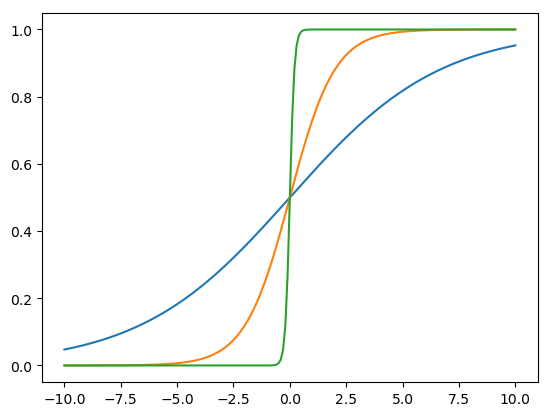

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1ee35e39e8>

In [3]:
x=-10:0.1:10
plot(x, f.(x,0.3))
plot(x, f.(x,1))
plot(x, f.(x,10))

### Wagi połączeń

In [4]:
a=-5
b=-25
W=[a -a ; b -b]

2×2 Array{Int64,2}:
  -5   5
 -25  25

In [5]:
function run(μ, steps=100, trans=1000)
    S=[0.35 ; 0.55]
    for i in 1:trans
        S=f.(W*S,μ)
    end

    X=[]
    Y=[]
    for i in 1:steps
        S=f.(W*S,μ)
        append!(X,S[1])
        append!(Y,S[2])
    end
    X,Y
end

run (generic function with 3 methods)

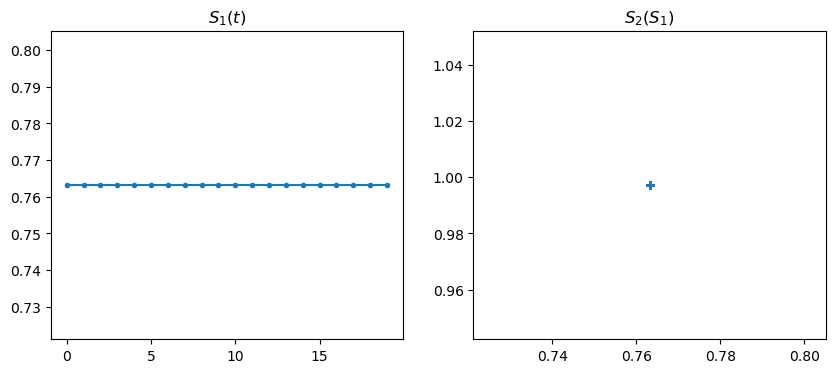

In [6]:
# 1, 2, 2.4, 2.55, 3(c), 4(c), 4.5(3), 4.6(5)
x,y=run(1,100)
figure(figsize=(10,4))
subplot(121)
plot(x[1:20],".-")
title(L"S_1(t)")
subplot(122)
title(L"S_2(S_1)")
plot(x,y,"+");

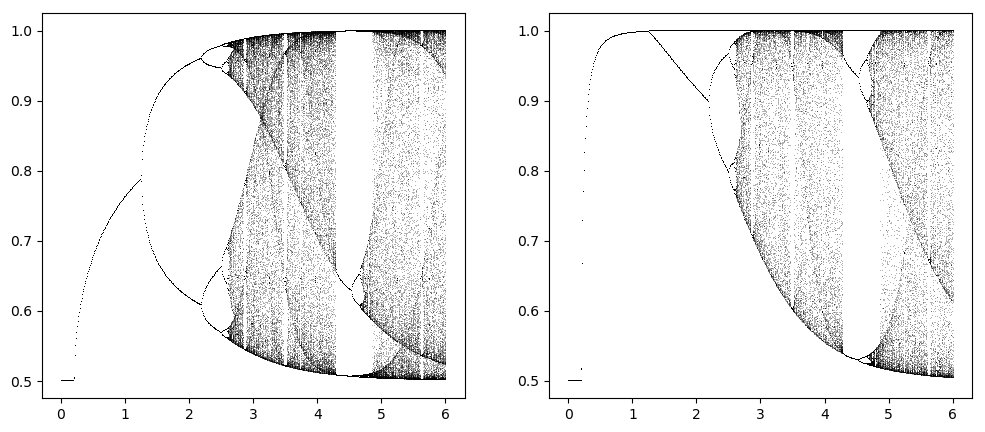

In [7]:
fig, axs = subplots(1, 2, figsize=(12, 5));

for μ in 0:0.01:6
    x,y=run(μ,200)
    axs[1].plot([μ for i in x],x,"k,", alpha=0.3);
    axs[2].plot([μ for i in y],y,"k,", alpha=0.3);
end